In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Getting data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-10-02 06:05:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-10-02 06:05:56 (7.41 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



### Aim is to predict future price of BitCoin

In [3]:
# Read using pandas:
df = pd.read_csv("./BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=['Date'],index_col=['Date'])

In [4]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


### Types of time series:
1. **Trend** - A clear long term increse or decrease
2. **Seasonal** - Time series affected by seasons, say the time of the year. Electricity usage may go up in summer, examples like this.
3. **Cyclic** - Rises and falls over unfixed intervals.

In [4]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


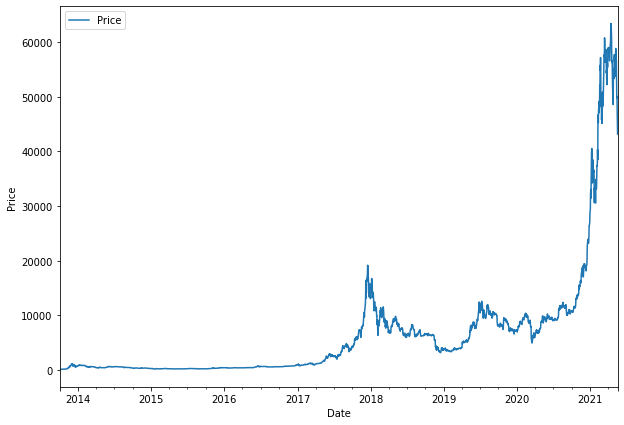

In [5]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel('Price');

In [6]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices.Price.to_numpy()
timesteps[:3],prices[:3]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483]))

### The wrong way of splitting.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps,prices,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

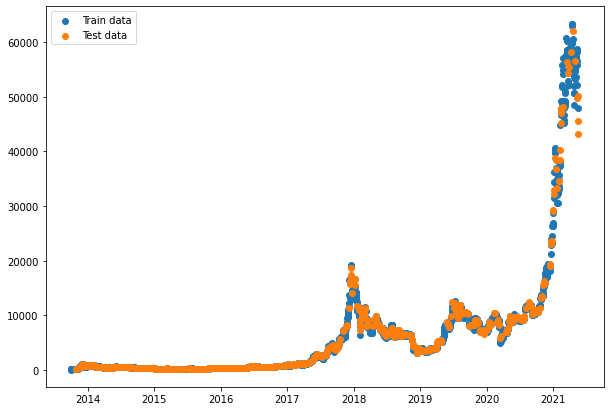

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,label="Train data")
plt.scatter(X_test,y_test,label="Test data")
plt.legend();

#### When we split randomly, we have test data mixed with train data, we want to create a split based on time rather than randomly.

### The right way.

In [8]:
split_size = int(0.8*len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

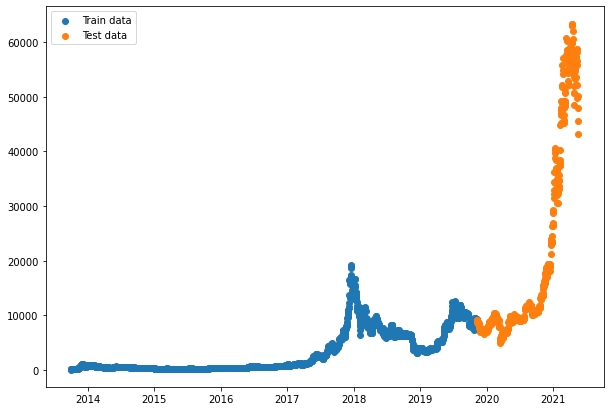

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,label="Train data")
plt.scatter(X_test,y_test,label="Test data")
plt.legend();

In [9]:
def plotts(timesteps,values,format='.',start=0,end=None,label=None):
#     plt.figure(figsize=(10,7))
    plt.plot(timesteps[start:end],values[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC_Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

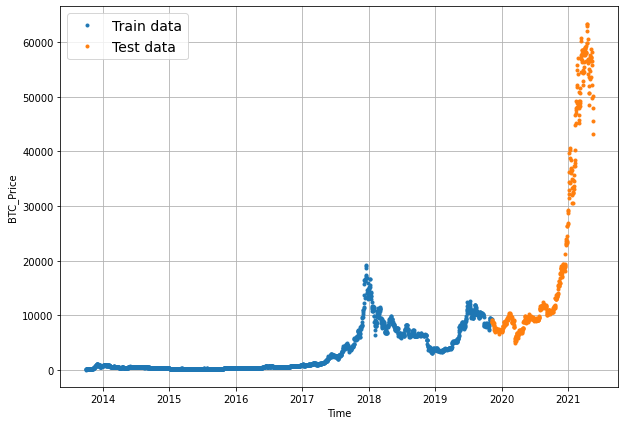

In [14]:
plt.figure(figsize=(10,7))
plotts(X_train,y_train,label="Train data")
plotts(X_test,y_test,label="Test data")
# X_train[0:None].shape,y_train.shape

### Model 0: Naive forecast
$$\hat{y}_{t} = y_{t-1}$$

In [15]:
naive_forecast = y_test[:-1]
naive_forecast[-10:],y_test[-10:]

(array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

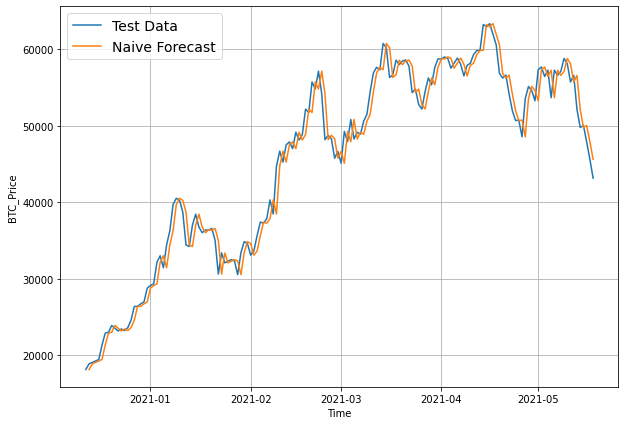

In [16]:
plt.figure(figsize=(10,7))
# plotts(X_train,y_train,label="Train Data")
plotts(X_test,y_test,label="Test Data",format="-",start=400)
plotts(X_test[1:],naive_forecast,format="-",label="Naive Forecast",start=400)

In [17]:
import tensorflow as tf

### MASE implementation.

In [10]:
def mase(y_true,y_pred):
    # assuming no seasonality
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))
    
    # MASE of naive model (assuming no seasonality)
    mae_naive = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
    return mae/mae_naive

In [19]:
mase(y_test[1:],naive_forecast)

2022-09-29 11:54:06.188509: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 11:54:06.368514: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 11:54:06.372607: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 11:54:06.379867: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>

In [11]:
def evaluate_preds(y_true,y_pred):
    y_true = tf.cast(y_true,dtype=tf.float32)
    y_pred = tf.cast(y_pred,dtype=tf.float32)
    
    mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
    mase_ = mase(y_true,y_pred)
    
    return {"mae":mae.numpy(),
            "mape":mape.numpy(),
           "mse":mse.numpy(),
           "rmse":rmse.numpy(),
           "mase":mase_.numpy()}

In [21]:
naive_results = evaluate_preds(y_test[1:],naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mase': 0.99957}

### Function to set window and horizon.

In [12]:
HORIZON = 1 # predict for next day
WINDOW_SIZE = 7 # use past week data
def get_labelled_window(x,horizon=HORIZON):
    """
    Input: [0,1,2,3,4,5,6,7]
    Output: ([0,1,2,3,4,5,6],[7])
    """
    return x[:,:-horizon], x[:,-horizon:]

In [23]:
get_labelled_window(tf.expand_dims(tf.range(8)+1,axis=0))

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [24]:
tf.expand_dims(tf.range(8)+1,axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [13]:
import numpy as np
def make_windows(x,window_size=WINDOW_SIZE,horizon=HORIZON):
    window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
#     print(window_indexes.shape,window_indexes)
    
    windowed_array = x[window_indexes]
#     print(windowed_array)
    windows, labels = get_labelled_window(windowed_array,horizon)
    return windows, labels

In [26]:
full_windows, full_labels = make_windows(prices)

In [27]:
for i in range(3):
    print(full_windows[i],full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] [125.96116]


### Splitting the data

In [14]:
def make_train_test_aplit(windows,labels,test_split=0.2):
    s = int((1-test_split)*len(windows))
    train_windows = windows[:s]
    train_labels = labels[:s]
    
    test_windows = windows[s:]
    test_labels = labels[s:]
    return train_windows, test_windows, train_labels, test_labels

In [29]:
train_windows, test_windows, train_labels, test_labels = make_train_test_aplit(full_windows,full_labels)
len(train_windows),len(test_windows)

(2224, 556)

### Model checkpoints

In [15]:
def create_model_checkpoint(model_name,save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath="/kaggle/working/"+save_path+"/"+model_name,
                                             verbose=0,
                                             save_best_only=True)

### Model 1
- Single layer with 128 units.
- An output layer with linear or no activation.
- Adam optimizer and MAE as loss.
- Batch size of 128.
- 100 epochs.

In [16]:
import tensorflow as tf
from tensorflow.keras import layers

In [32]:
tf.random.set_seed(42)
m1 = tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(HORIZON,activation='linear')
],name="Model1_Dense")
m1.compile(loss='mae',optimizer='adam',metrics=['mae','mse'])
h1 = m1.fit(train_windows,train_labels,validation_data=(test_windows,test_labels),
           epochs=100,verbose=1,batch_size=128, 
            callbacks=[create_model_checkpoint(m1.name)])

2022-09-29 11:54:11.589222: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
18/18 [==============================] - 2s 15ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000


2022-09-29 11:54:13.913367: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9992 - val_mae: 1005.9992 - val_mse: 3441833.5000
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5938 - val_loss: 923.2863 - val_mae: 923.2863 - val_mse: 2868221.2500
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.7500
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 165.0895 - mae: 165.0895 - mse: 145490.8125 - val_loss: 895.2236 - val_mae: 895.2236 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 158.5210 - mae: 158.5210 - mse: 133817.7500 - val_loss: 855.1985 - val_mae: 855.1985 - val_mse: 2481873.7500
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 151.3566 - mae:

In [33]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mase': 0.99957}

In [34]:
# Load the saved model
m1_loaded = tf.keras.models.load_model("/kaggle/working/model_experiments/Model1_Dense")

In [35]:
m1_loaded.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.8750


[568.9510498046875, 568.9510498046875, 1171743.875]

In [17]:
def make_preds(model,input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [37]:
m1_forecast = make_preds(m1_loaded,test_windows)

In [38]:
test_labels.shape, m1_forecast.shape

((556, 1), TensorShape([556]))

In [39]:
m1_results = evaluate_preds(tf.squeeze(test_labels),m1_forecast)
m1_results # This is due to shape discrepancy
# Squeezing the test_labels solves the issues

{'mae': 568.95105,
 'mape': 2.5448983,
 'mse': 1171743.9,
 'rmse': 1082.4712,
 'mase': 0.9994894}

### Visualizing the forecast

In [40]:
test_labels.shape,X_test[-len(test_windows):].shape,test_labels[:,0].shape

((556, 1), (556,), (556,))

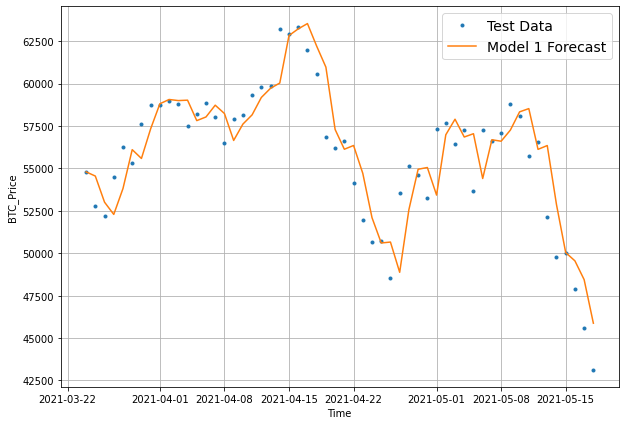

In [41]:
offset = 500
plt.figure(figsize=(10,7))
plotts(timesteps=X_test[-len(test_windows):],
       values=test_labels[:,0],start=offset, label="Test Data")
plotts(timesteps=X_test[-len(test_windows):],values=m1_forecast, 
       label="Model 1 Forecast", start=offset, format='-')

### Model 2
- Same as model 1.
- But with window size 30.

In [42]:
windows, labels = make_windows(prices,window_size=30,horizon=1)
train_windows, test_windows, train_labels, test_labels = make_train_test_aplit(windows,labels)                      

In [43]:
train_windows.shape

(2205, 30)

In [44]:
m2 = tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='linear')
],name="Model2_Dense")
m2.compile(loss='mae',optimizer='adam',metrics=['mae','mse'])
h2 = m2.fit(train_windows,train_labels,validation_data=(test_windows,test_labels),
           epochs=100,batch_size=128,callbacks=[create_model_checkpoint(model_name=m2.name)],verbose=1)

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 1355.7623 - mae: 1355.7623 - mse: 7234175.0000 - val_loss: 3228.6924 - val_mae: 3228.6924 - val_mse: 25149144.0000
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 440.8260 - mae: 440.8260 - mse: 832458.1250 - val_loss: 2100.2903 - val_mae: 2100.2903 - val_mse: 11994400.0000
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 324.9240 - mae: 324.9240 - mse: 479828.2188 - val_loss: 1438.4039 - val_mae: 1438.4039 - val_mse: 6253972.0000
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 276.5896 - mae: 276.5896 - mse: 356024.1875 - val_loss: 1331.1696 - val_mae: 1331.1696 - val_mse: 5316210.5000
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 235.3472 - mae: 235.3472 - mse: 266939.4688 - val_loss: 1217.5144 - val_mae: 1217.5144 - val_mse: 4435395.5000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 2

In [45]:
m2_loaded = tf.keras.models.load_model("/kaggle/working/model_experiments/Model2_Dense")
m2_loaded.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 608.2639 - mae: 608.2639 - mse: 1268798.7500


[608.263916015625, 608.263916015625, 1268798.75]

In [46]:
m2_forecast = m2_loaded.predict(test_windows)
m2_results = evaluate_preds(tf.squeeze(test_labels),tf.squeeze(m2_forecast))
m2_results

{'mae': 608.2639,
 'mape': 2.7548683,
 'mse': 1268798.9,
 'rmse': 1126.4097,
 'mase': 1.0632513}

In [47]:
m2_forecast.shape,test_labels.shape

((552, 1), (552, 1))

### Model 3
- Same as model 2.
- But window size of 30 and horizon of 7.

In [48]:
windows, labels = make_windows(prices,window_size=30,horizon=7)
train_windows, test_windows, train_labels, test_labels = make_train_test_aplit(windows,labels) 
train_windows.shape, train_labels.shape

((2200, 30), (2200, 7))

In [49]:
tf.random.set_seed(42)
m3 = tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(7)
],name="Model3_Dense")
m3.compile(loss='mae',optimizer='adam',metrics=['mae','mse'])
h3 = m3.fit(train_windows,train_labels,validation_data=(test_windows,test_labels),
           epochs=100,batch_size=128,callbacks=[create_model_checkpoint(model_name=m3.name)],verbose=1)

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 1476.6752 - mae: 1476.6752 - mse: 10390734.0000 - val_loss: 3088.5615 - val_mae: 3088.5615 - val_mse: 24386350.0000
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 552.8943 - mae: 552.8943 - mse: 1336176.7500 - val_loss: 2462.4548 - val_mae: 2462.4548 - val_mse: 17112268.0000
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 435.1978 - mae: 435.1978 - mse: 893449.0000 - val_loss: 2283.1482 - val_mae: 2283.1482 - val_mse: 14950888.0000
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 391.9787 - mae: 391.9787 - mse: 745983.7500 - val_loss: 1975.1218 - val_mae: 1975.1218 - val_mse: 11680637.0000
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 357.9485 - mae: 357.9485 - mse: 627137.9375 - val_loss: 2000.1556 - val_mae: 2000.1556 - val_mse: 11665230.0000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - lo

In [50]:
m3_loaded = tf.keras.models.load_model("/kaggle/working/model_experiments/Model3_Dense")
m3_loaded.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1234.8838 - mae: 1234.8838 - mse: 5393733.5000


[1234.8837890625, 1234.8837890625, 5393733.5]

In [51]:
m3_forecast = make_preds(m3,test_windows)
m3_forecast.shape

TensorShape([551, 7])

In [18]:
def evaluate_preds(y_true,y_pred):
    y_true = tf.cast(y_true,dtype=tf.float32)
    y_pred = tf.cast(y_pred,dtype=tf.float32)
    
    mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
    mase_ = mase(y_true,y_pred)
    
    # Account for longer horizens
    if mae.ndim>0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase_ = tf.reduce_mean(mase_)
    
    return {"mae":mae.numpy(),
            "mape":mape.numpy(),
           "mse":mse.numpy(),
           "rmse":rmse.numpy(),
           "mase":mase_.numpy()}

In [53]:
m3_results = evaluate_preds(tf.squeeze(test_labels),m3.predict(test_windows))
m3_results

{'mae': 1340.4274,
 'mape': 5.945062,
 'mse': 5758703.5,
 'rmse': 1513.9365,
 'mase': 2.3852155}

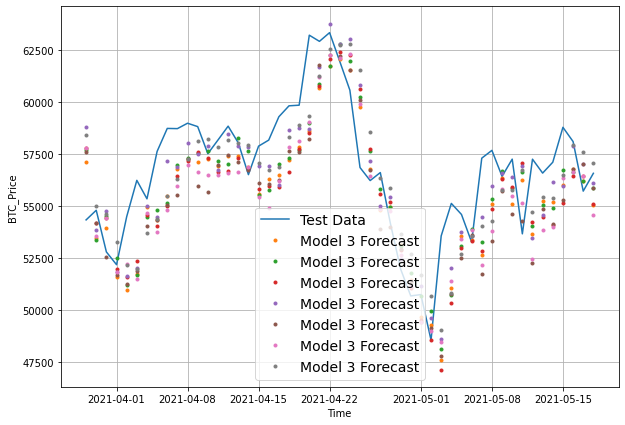

In [54]:
offset = 500
plt.figure(figsize=(10,7))
plotts(timesteps=X_test[-len(test_windows):],
       values=test_labels[:,0],start=offset, label="Test Data",format='-')
plotts(timesteps=X_test[-len(test_windows):],values=m3_forecast, 
       label="Model 3 Forecast", start=offset)

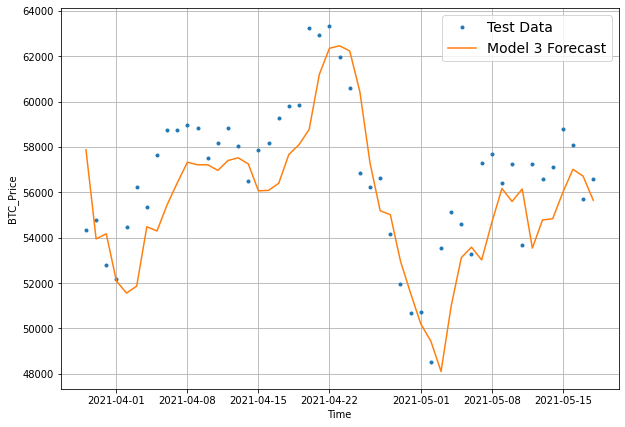

In [55]:
offset = 500
plt.figure(figsize=(10,7))
plotts(timesteps=X_test[-len(test_windows):],
       values=test_labels[:,0],start=offset, label="Test Data")
plotts(timesteps=X_test[-len(test_windows):],values=tf.reduce_mean(m3_forecast,axis=1), 
       label="Model 3 Forecast", start=offset, format='-')
# But this is average of 7 days 

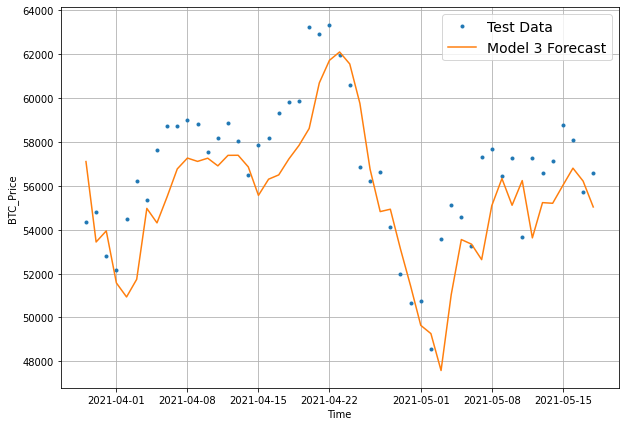

In [56]:
offset = 500
plt.figure(figsize=(10,7))
plotts(timesteps=X_test[-len(test_windows):],
       values=test_labels[:,0],start=offset, label="Test Data")
plotts(timesteps=X_test[-len(test_windows):],values=m3_forecast[:,0], 
       label="Model 3 Forecast", start=offset, format='-')
# But this is average of 7 days 

### Comparing models till now.

In [57]:
pd.DataFrame({"naive":naive_results,
              "horizon_1_window_7":m1_results,
              "horizon_1_window_30":m2_results,
              "horizon_7_window_30":m3_results}).transpose()

,mae,mape,mse,rmse,mase
naive,567.980225,2.516525,1147547.000,1071.236206,0.999570
horizon_1_window_7,568.951050,2.544898,1171743.875,1082.471191,0.999489
horizon_1_window_30,608.263916,2.754868,1268798.875,1126.409668,1.063251
horizon_7_window_30,1340.427368,5.945062,5758703.500,1513.936523,2.385216


<AxesSubplot:>

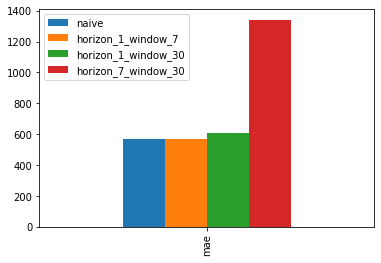

In [58]:
pd.DataFrame({"naive":naive_results,
              "horizon_1_window_7":m1_results['mae'],
              "horizon_1_window_30":m2_results['mae'],
              "horizon_7_window_30":m3_results['mae']},index=['mae']).plot(kind='bar')

### Model 4: Conv1D model.

In [59]:
HORIZON = 1 # Predict price of bitcoin on next day
WINDOW_SIZE = 7 
full_windows, full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
full_windows.shape,full_labels.shape

((2780, 7), (2780, 1))

In [60]:
train_windows, test_windows, train_labels, test_labels = make_train_test_aplit(
windows=full_windows,labels=full_labels)

In [19]:
from tensorflow.keras.layers import Conv1D

In [62]:
# In Conv1D layer, we need input shape: (batch_size,timesteps,input_dim)
m4 = tf.keras.Sequential([
    layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
    Conv1D(256,2,padding='causal'),
    Conv1D(256,2,padding='causal'),
#     layers.Flatten(),
    layers.Dense(1)
],name="Model4_Comv1D")
m4.compile(loss='mae',optimizer='adam',metrics=['mae','mse'])

In [63]:
h4 = m4.fit(train_windows,train_labels,validation_data=(test_windows,test_labels),
            epochs=100,callbacks=[create_model_checkpoint(model_name=m4.name)],batch_size=128)

Epoch 1/100


2022-09-29 11:56:10.060466: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


18/18 [==============================] - 8s 20ms/step - loss: 1140.2433 - mae: 1140.2433 - mse: 4420179.0000 - val_loss: 1717.9243 - val_mae: 1717.9243 - val_mse: 6963435.0000
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 325.6385 - mae: 325.6385 - mse: 401589.3125 - val_loss: 938.2339 - val_mae: 938.2339 - val_mse: 2896727.5000
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 153.2010 - mae: 153.2010 - mse: 122012.7031 - val_loss: 642.3976 - val_mae: 642.3976 - val_mse: 1402749.8750
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 140.1299 - mae: 140.1299 - mse: 91949.6797 - val_loss: 598.7618 - val_mae: 598.7618 - val_mse: 1242206.3750
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 137.4695 - mae: 137.4695 - mse: 92065.8672 - val_loss: 1193.0157 - val_mae: 1193.0157 - val_mse: 3553829.5000
Epoch 6/100
18/18 [==============================] - 0s 12ms/step - loss: 149.9185 - mae: 149.9

In [64]:
m4_loaded = tf.keras.models.load_model("/kaggle/working/model_experiments/Model4_Comv1D")
m4_loaded.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 561.2795 - mae: 561.2795 - mse: 1138755.8750


[561.2794799804688, 561.2794799804688, 1138755.875]

In [65]:
m4_results = evaluate_preds(tf.squeeze(test_labels),m4_loaded.predict(test_windows).reshape(1,556))
m4_results
# Here we have beaten the naive model

{'mae': 561.2795,
 'mape': 2.5010908,
 'mse': 1138755.8,
 'rmse': 1067.125,
 'mase': 0.9860126}

In [66]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mase': 0.99957}

### Model 5: LSTM

In [67]:
m5 = tf.keras.Sequential([
    layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
    layers.LSTM(128,return_sequences=True,activation='relu'),
    layers.LSTM(128,activation='relu'),
    layers.Dense(32),
    layers.Dense(1)
],name="Model5_LSTM")
m5.compile(loss='mae',optimizer='adam',metrics=['mae','mse'])

In [68]:
h5 = m5.fit(train_windows,train_labels,validation_data=(test_windows,test_labels),
            epochs=100,callbacks=[create_model_checkpoint(model_name=m5.name)],batch_size=128)

Epoch 1/100
18/18 [==============================] - 4s 60ms/step - loss: 2590.6443 - mae: 2590.6443 - mse: 16687377.0000 - val_loss: 8615.4365 - val_mae: 8615.4365 - val_mse: 131995384.0000
Epoch 2/100
18/18 [==============================] - 0s 16ms/step - loss: 451.7414 - mae: 451.7414 - mse: 833586.6875 - val_loss: 2098.3276 - val_mae: 2098.3276 - val_mse: 9912954.0000
Epoch 3/100
18/18 [==============================] - 0s 16ms/step - loss: 226.7753 - mae: 226.7753 - mse: 237623.3594 - val_loss: 1235.0220 - val_mae: 1235.0220 - val_mse: 4113827.0000
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 184.0409 - mae: 184.0409 - mse: 175169.4062 - val_loss: 886.9283 - val_mae: 886.9283 - val_mse: 2526358.0000
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 163.2761 - mae: 163.2761 - mse: 126452.6328 - val_loss: 865.9128 - val_mae: 865.9128 - val_mse: 2568905.0000
Epoch 6/100
18/18 [==============================] - 0s 16ms/step - loss:

In [69]:
m5_loaded = tf.keras.models.load_model("/kaggle/working/model_experiments/Model5_LSTM")
m5_loaded.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 563.1276 - mae: 563.1276 - mse: 1155338.0000


[563.1275634765625, 563.1275634765625, 1155338.0]

In [70]:

m5_results = evaluate_preds(tf.squeeze(test_labels),m5_loaded.predict(test_windows).reshape(1,556))
m5_results

{'mae': 563.12756,
 'mape': 2.5262425,
 'mse': 1155338.1,
 'rmse': 1074.8666,
 'mase': 0.9892592}

### Making a multivariate time series model
- What is basically a multivariate time series ?
  - It is a time series which has more than one time dependent variable and each variable not only depends on time but also
  on other variables.
  - Whatever affects or influences our target variable, can be used as a feature.
  - For example, the event that a reputed person tweeted about BitCoin prices, this thing can affect or influence the price of BitCoin the same day or for the coming days.

In [20]:
bitcoin_prices.head()
# We will add the bitcoin halving event as a feature

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [23]:
block_reward_1 = 50
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dats
block_reward_2_dt = np.datetime64("2012-11-28")
block_reward_3_dt = np.datetime64("2016-07-09")
block_reward_4_dt = np.datetime64("2020-05-18")
block_reward_2_dt

numpy.datetime64('2012-11-28')

In [24]:
block_2_reward_days = (block_reward_3_dt-bitcoin_prices.index[0]).days
block_3_reward_days = (block_reward_4_dt-bitcoin_prices.index[0]).days
block_2_reward_days,block_3_reward_days

(1012, 2421)

In [25]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

bitcoin_prices_block.iloc[:block_2_reward_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_2_reward_days:block_3_reward_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_3_reward_days:,-1] = block_reward_4

In [75]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<AxesSubplot:xlabel='Date'>

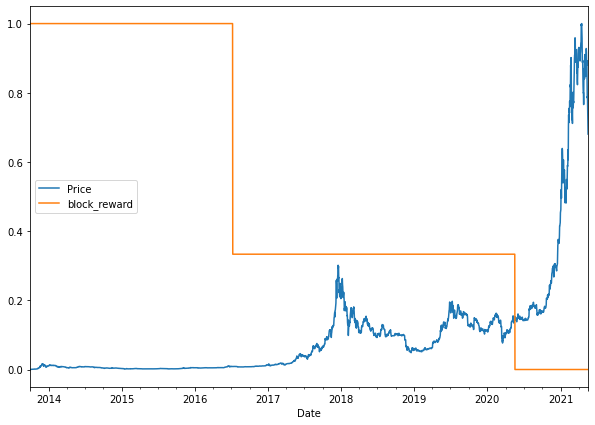

In [26]:
from sklearn.preprocessing import minmax_scale
scaled_price_df = pd.DataFrame(minmax_scale(bitcoin_prices_block),columns=bitcoin_prices_block.columns,index=bitcoin_prices_block.index)
scaled_price_df.plot(figsize=(10,7))

### Making windowed multivariate data 

In [27]:
HORIZON=1
WINDOW_SIZE=7
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f'Price_{i+1}'] = bitcoin_prices_block['Price'].shift(periods=i+1)

In [78]:
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [28]:
# Create X and y
X = bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [80]:
X.head()

,block_reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


### Making train and test splits

In [29]:
split = len(X)-int(len(X)*0.2)
X_train , y_train = X[:split], y[:split]
X_test , y_test = X[split:], y[split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [82]:
X_train

,block_reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661
...,...,...,...,...,...,...,...,...
2019-11-05,12.5,9202.415039,9290.896484,9197.632812,9131.410156,9225.995117,9455.724609,9458.223633
2019-11-06,12.5,9369.627930,9202.415039,9290.896484,9197.632812,9131.410156,9225.995117,9455.724609
2019-11-07,12.5,9326.599609,9369.627930,9202.415039,9290.896484,9197.632812,9131.410156,9225.995117


### Building Model 6: Multivariate Model

In [83]:
tf.random.set_seed(42)
m6 = tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(HORIZON)
], name="Model6_Dense_Multivariate")
m6.compile(loss='mae',optimizer='adam')
h6 = m6.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,
           callbacks=[create_model_checkpoint(m6.name)])

Epoch 1/100
70/70 [==============================] - 1s 5ms/step - loss: 524.0231 - val_loss: 1194.4297
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 189.9447 - val_loss: 957.4092
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 169.2797 - val_loss: 888.6898
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 155.6410 - val_loss: 839.4869
Epoch 5/100
70/70 [==============================] - 0s 5ms/step - loss: 148.3778 - val_loss: 773.9175
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 137.3192 - val_loss: 748.4242
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 136.9815 - val_loss: 726.5151
Epoch 8/100
70/70 [==============================] - 0s 3ms/step - loss: 134.0782 - val_loss: 652.7263
Epoch 9/100
70/70 [==============================] - 0s 3ms/step - loss: 126.3959 - val_loss: 871.7198
Epoch 10/100
70/70 [==============================] - 0s 4ms/step - loss

In [84]:
m6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 666.0203


666.020263671875

In [85]:
m6_loaded = tf.keras.models.load_model("/kaggle/working/model_experiments/Model6_Dense_Multivariate")

In [86]:
m6_loaded.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.0614


567.0614013671875

In [87]:
m6_preds = tf.squeeze(m6_loaded.predict(X_test))
m6_results = evaluate_preds(y_test, m6_preds)
m6_results

{'mae': 567.0614,
 'mape': 2.5321398,
 'mse': 1154881.6,
 'rmse': 1074.6542,
 'mase': 0.9961698}

In [88]:
m1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mse': 1171743.9,
 'rmse': 1082.4712,
 'mase': 0.9994894}

### N-BEATS

- What is N-BEATS?
It is a deep neural network architecture with backword and forward residual links and stack of fully connected layers. It is applicable to many domains without change.

- N-BEATS Architectue
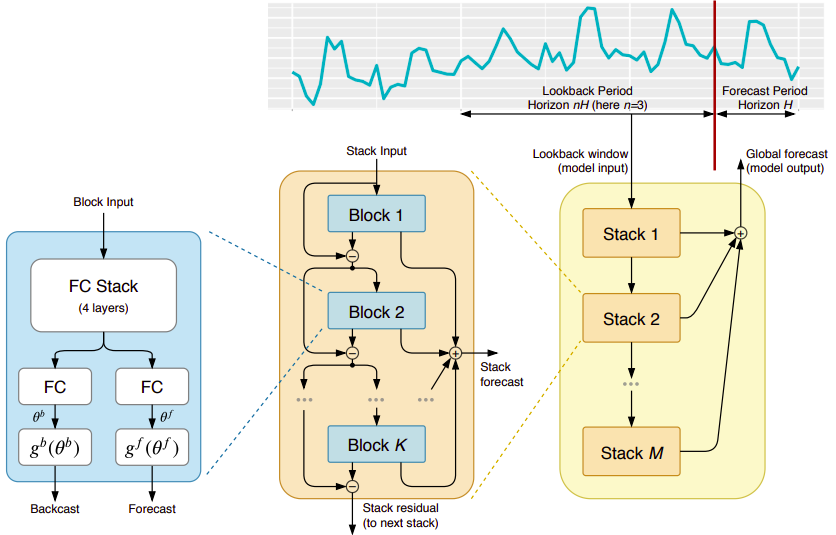

- Input to the stack 1 will pass through a block like this. The figure also shows the layers inside each block. In the figure the backcast period is 15 and forecast period is 5.
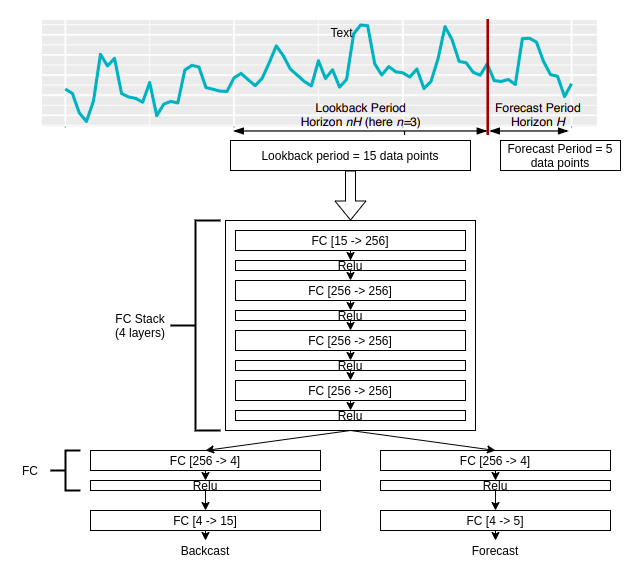
- This block predicts future 5 points and also the input.
- A stack consists of many blocks and there is double residual stacking.
- Double residual stacking includes two operations on the output of each block, the backcast predicted by block 1 will be used along with the input of block 1 (subtraction) as an input to the block 2. Following this logic, input to every Block would be a 15 dim vector which is made up of element wise subtraction of previous Block’s Backcast output and input. 
- The Forecast output of all the blocks in the Stack will be added element wise to yield a 5 dim vector. This vector is going to serve as Stack Forecast Output.
- This is how the stacks work:

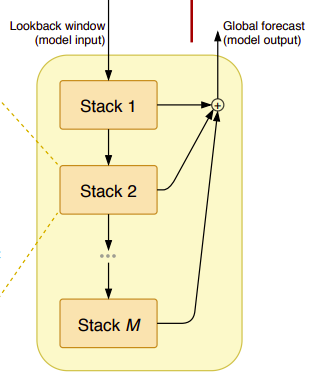

#### Note:
I have used the above images from various medium articles, which in turn have used it from the N-BEATS paper, thanks to all those authors. I also understood the architecture of N-BEATS from those articles. I have put some links below as references:

[N-BEATS](https://kshavg.medium.com/n-beats-neural-basis-expansion-analysis-for-interpretable-time-series-forecasting-91e94c830393#:~:text=N%2Dbeats%20is%20a%20deep,domains%2C%20and%20fast%20to%20train.)

[N-BEATS Unleashed](https://towardsdatascience.com/n-beats-unleashed-deep-forecasting-using-neural-basis-expansion-analysis-in-python-343dd6307010)

### The hyperparameters in N-BEATS architecture:
1. The sizes of the input and output i.e. those of backcast and forecast.
2. The number of blocks.
3. The width of the fully-connected layer in each block.

### Creating the Block layer

Refer to [this](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) for creating custom layers in TensorFlow.

In [89]:
# Creating custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                input_size: int,
                theta_size: int,
                horizon: int,
                n_neurons: int,
                n_layers:int,
                **kwargs): # kwargs is to consider arguments of the parent class
        
        super().__init__(**kwargs)
        self.input_size = input_size # The backcast size(window)
        self.theta_size = theta_size
        self.horizon = horizon # The forecast size(window)
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        # Block has 4 fully connected layers(according to the paper)
        self.hidden = [tf.keras.layers.Dense(n_neurons,activation='relu') for _ in range(n_layers)]
        
        # Output of block is a theta layer with a linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size)
        
    def call(self,inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        
        theta = self.theta_layer(x)
#         print(theta)
        # Output the backcast and forecast
        backcast, forecast = theta[:,:self.input_size], theta[:,-self.horizon:]
        return backcast, forecast

### Testing the custom layer on dummy data

In [90]:
# Dummy NBeatsBlock layer
dummy_nbeats_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                theta_size=WINDOW_SIZE+HORIZON,
                                horizon=HORIZON,
                                n_neurons=128,
                                n_layers=4)

In [91]:
# Dummy inputs(same size as input size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [92]:
backcast, forecast = dummy_nbeats_layer(dummy_inputs)
print("Backcast:",backcast)
print("Forecast:",forecast)

Backcast: tf.Tensor(
[[ 0.19014986  0.8379836  -0.32870018  0.2515991  -0.4754027  -0.7783665
  -0.5299448 ]], shape=(1, 7), dtype=float32)
Forecast: tf.Tensor([[-0.75542134]], shape=(1, 1), dtype=float32)


### Creating a data pipeline for N-BEATS algorithm

In [93]:
HORIZON = 1
WINDOW_SIZE = 7

In [94]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [95]:
# Adding windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [96]:
X = bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split = int(len(X)*0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X_train), len(X_test)

(2224, 556)

In [97]:
# Use tf.data to make efficient datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(
X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(
y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(
X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(
y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

BATCH_SIZE = 1024 # As mentioned in the paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(
tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(
tf.data.AUTOTUNE)
train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Hyperparameters for N-BEATS

In [98]:
# Setting up hyperparameters from the paper
N_EPOCHS = 5000
N_NEURONS = 512 # The width of the network as per the paper
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE*HORIZON # In my case, it's 7
THETA_SIZE = WINDOW_SIZE + HORIZON
INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting the residual connections ready

In [99]:
# Checking out the add and subtract layers
tensor1 = tf.range(10)+10
tensor2 = tf.range(10)

#subtract
print(tensor1)
print(tensor2)
print(layers.subtract([tensor1,tensor2]))
print(layers.add([tensor1,tensor2]))

tf.Tensor([10 11 12 13 14 15 16 17 18 19], shape=(10,), dtype=int32)
tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
tf.Tensor([10 10 10 10 10 10 10 10 10 10], shape=(10,), dtype=int32)
tf.Tensor([10 12 14 16 18 20 22 24 26 28], shape=(10,), dtype=int32)


### Steps
1. Setup an `N-BEATS block`. Then I will use loops to implement stacks.
2. Create an input layer for the N-BEATS stack.
3. Make initial backcast and forecasts.
4. Use loop to create stacks of blocks.
5. Use N-BEATS block class to create blocks.
6. Create double residual stacking using `add` and `subtract`.
7. Put the inputs and outputs in together in the model.
8. Compile model with `MAE` loss and `Adam` optimizer(as in the paper).
9. Fitting the model with 5000 epochs(we can use `EarlyStopping` here, and also `Reduce LR on Plateau`).

In [100]:
%time
tf.random.set_seed(42)

# 1. Setup N-BEATS block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                theta_size=THETA_SIZE,
                                horizon=HORIZON,
                                n_neurons=N_NEURONS,
                                n_layers=N_LAYERS,
                                name="InitialNBeatsBlock")

# 2. Create input layer
stack_input = layers.Input(shape=(INPUT_SIZE),name="stack_input")

# 3. Make initial backcast and forecast(this will be used in the for loop)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks
for i,_ in enumerate(range(N_STACKS-1)):
    
    # 5. Using the N-BEATS block to get backcasts and forecasts
    backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                    theta_size=THETA_SIZE,
                                    horizon=HORIZON,
                                    n_neurons=N_NEURONS,
                                    n_layers=N_LAYERS,
                                    name=f"NBeatsBlock_{i+1}"
                                    )(residuals)
    # 6. Creating double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"Subtract_{i+1}")
    forecast = layers.add([forecast,block_forecast],name=f"Add_{i+1}")
    
# 7. Put together input and output in model
nbeats_model = tf.keras.Model(inputs=stack_input,outputs=forecast,name="NBeats_Model")

# 8. Compile model
nbeats_model.compile(loss='mae',
                    optimizer='adam')

# 9. Fit model using early stopping and ReduceLRPlateau
nbeats_hist = nbeats_model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    validation_data=test_dataset,
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=200,restore_best_weights=True),
               tf.keras.callbacks.ReduceLROnPlateau(patience=100,verbose=1,monitor="val_loss")]
)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs

Epoch 00900: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 01000: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


In [101]:
# Evaluation
nbeats_model.evaluate(test_dataset)

1/1 [==============================] - 0s 29ms/step - loss: 574.1849


574.1848754882812

In [102]:
nbeats_preds = make_preds(nbeats_model,test_dataset)
nbeats_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8873.401, 8791.798, 9005.714, 8781.412, 8757.818, 8735.38 ,
       8669.064, 8524.292, 8472.085, 8510.48 ], dtype=float32)>

In [103]:
nbeats_results = evaluate_preds(y_test,nbeats_preds)
nbeats_results

{'mae': 574.1849,
 'mape': 2.5745807,
 'mse': 1185400.1,
 'rmse': 1088.7609,
 'mase': 1.0086838}

### Plotting the N-BEATS model

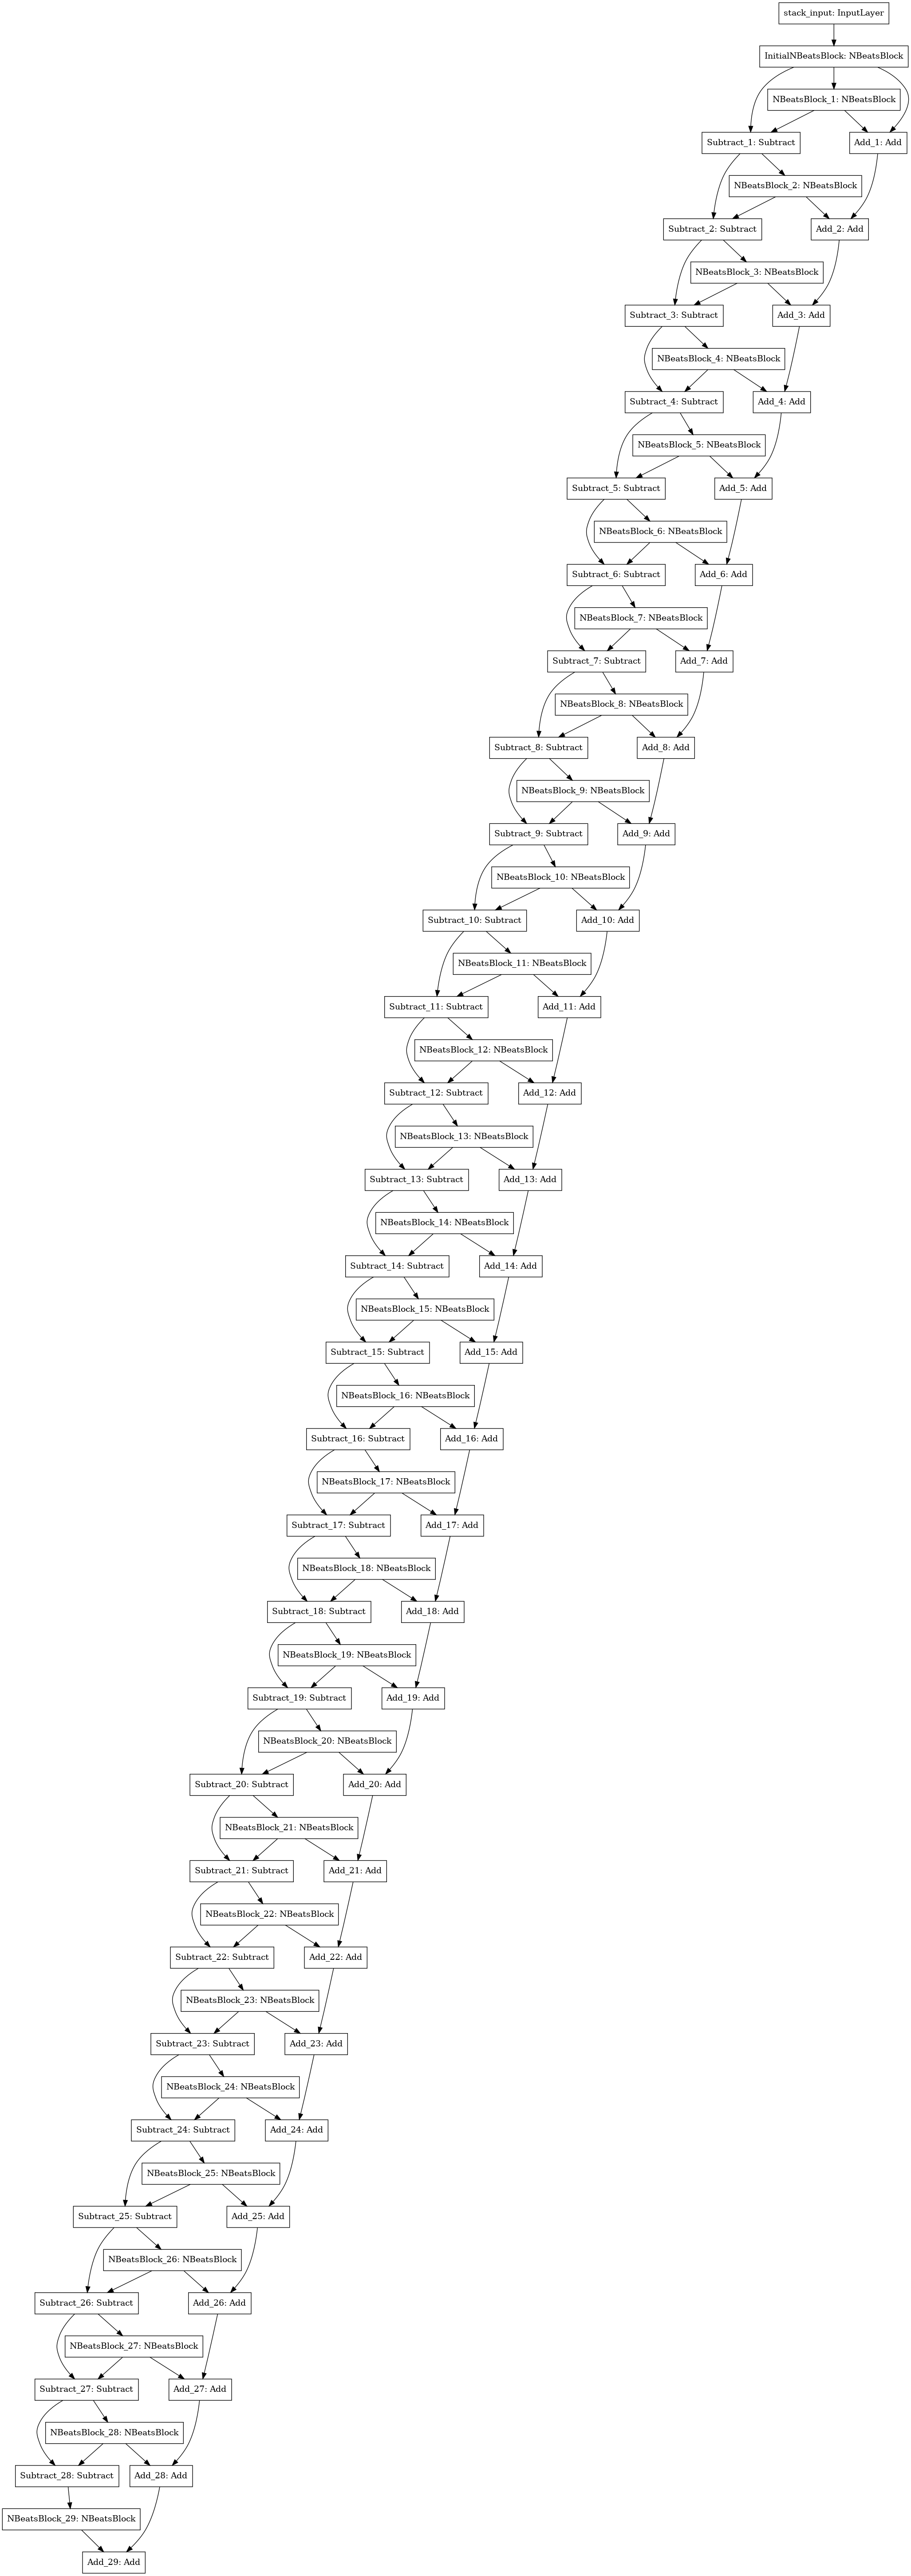

In [104]:
tf.keras.utils.plot_model(nbeats_model)

### Ensemble approach
#### Building and fitting models using different loss functions.

In [105]:
def get_ensembles(horizon=HORIZON,train_data=train_dataset,
                  test_data=test_dataset,num_iter=10,
                  num_epochs=1000,loss_functions=["mae","mse","mape"]):
    """
    Returns list of trained models each trained on MAE, MSE, and MAPE
    """
    # Initialize empty list
    ensemble_models = []
    
    # Loops
    for i in range(num_iter):
        # Build and fit a new model with a different loss functions
        for loss in loss_functions:
            print(f"Optimizing model by reducing {loss} for {num_epochs}: Model_{i+1}")
            
            model = tf.keras.Sequential([
                # Using "he_normal" initializer to initialize weights from a 
                # normal distribution
                layers.Dense(128,activation='relu',kernel_initializer="he_normal"),
                layers.Dense(128,activation='relu',kernel_initializer="he_normal"),
                layers.Dense(HORIZON)
            ])
            
            # Compile
            model.compile(loss=loss,optimizer="adam",metrics=["mae","mse"])
            
            # Fit the current model
            model.fit(train_data,
                      epochs=num_epochs,
                      verbose=0,
                      validation_data=test_data, 
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=200,restore_best_weights=True),
                                tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=100,verbose=1)])
            
            ensemble_models.append(model)
    return ensemble_models

In [106]:
%time
# Getting list of ensembles
ensemble_models = get_ensembles(num_iter=3,num_epochs=1000)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 14.1 µs
Optimizing model by reducing mae for 1000: Model_1

Epoch 00989: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing mse for 1000: Model_1

Epoch 00600: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00716: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00816: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing mape for 1000: Model_1

Epoch 00168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing mae for 1000: Model_2

Epoch 00939: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing mse for 1000: Model_2

Epoch 00425: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00525: ReduceLROn

In [107]:
len(ensemble_models)

9

### Making predictions with ensemble approach

In [30]:
def make_ensemble_preds(models,data):
    ensemble_preds = []
    
    for model in models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [109]:
ensemble_preds = make_ensemble_preds(ensemble_models,test_dataset)
ensemble_preds

<tf.Tensor: shape=(9, 556), dtype=float32, numpy=
array([[ 8773.998 ,  8768.769 ,  9047.864 , ..., 50401.824 , 49483.15  ,
        46395.992 ],
       [ 8767.493 ,  8742.92  ,  9052.846 , ..., 49351.215 , 48530.387 ,
        45341.83  ],
       [ 8745.423 ,  8733.032 ,  9101.387 , ..., 49267.17  , 47660.42  ,
        45370.055 ],
       ...,
       [ 8818.776 ,  8777.056 ,  9089.0205, ..., 49657.43  , 48634.64  ,
        45644.055 ],
       [ 8737.645 ,  8793.693 ,  9115.848 , ..., 50141.25  , 48300.945 ,
        45703.223 ],
       [ 8778.978 ,  8758.611 ,  9073.446 , ..., 50055.938 , 47938.64  ,
        45133.914 ]], dtype=float32)>

In [110]:
ensemble_preds.shape

TensorShape([9, 556])

In [111]:
ensemble_results = evaluate_preds(y_test,np.median(ensemble_preds,axis=0))
ensemble_results

{'mae': 568.2187,
 'mape': 2.5860639,
 'mse': 1148781.5,
 'rmse': 1071.8123,
 'mase': 0.99820286}

In [112]:
ensemble_mean = tf.reduce_mean(ensemble_preds,axis=0)
ensemble_median = np.median(ensemble_preds,axis=0)
ensemble_mean[:5],ensemble_median[:5]

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8777.179, 8771.017, 9077.813, 8729.102, 8736.596], dtype=float32)>,
 array([8778.252, 8777.056, 9073.446, 8721.858, 8739.241], dtype=float32))

In [113]:
ensemble_mean_results = evaluate_preds(y_test,ensemble_mean)
ensemble_median_results = evaluate_preds(y_test,ensemble_median)
ensemble_mean_results,ensemble_median_results

({'mae': 567.5869,
  'mape': 2.580527,
  'mse': 1149205.1,
  'rmse': 1072.0099,
  'mase': 0.997093},
 {'mae': 568.2187,
  'mape': 2.5860639,
  'mse': 1148781.5,
  'rmse': 1071.8123,
  'mase': 0.99820286})

In [114]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mase': 0.99957}

### Prediction intervals

In [119]:
tf.math.reduce_std(ensemble_preds,axis=0),ensemble_preds.shape

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 24.896294 ,  21.801435 ,  28.653023 ,  33.44573  ,  29.222645 ,
         27.582354 ,  34.415615 ,  36.138878 ,  14.476371 ,  15.505364 ,
         23.578022 ,  14.8914795,  27.301275 ,  29.938507 ,  41.35118  ,
         52.083496 ,  49.078724 ,  31.307669 ,  46.165688 ,  39.052868 ,
         37.329376 ,  22.690632 ,  41.43446  ,  34.310535 ,  24.429592 ,
         30.401773 ,  17.577341 ,  13.960063 ,  22.358883 ,  16.538506 ,
         27.181252 ,  12.423185 ,  10.765208 ,  13.118084 ,  16.386974 ,
         16.504025 ,  14.115532 ,  10.927385 ,  20.76145  ,  17.720863 ,
         48.400875 ,  38.744167 ,  48.510754 ,  47.5507   ,  46.165504 ,
         34.166862 ,  15.206583 ,  16.794115 ,  10.882043 ,  17.78541  ,
         16.055967 ,  15.63758  ,  22.684675 ,  10.854759 ,  11.929935 ,
         16.194086 ,  19.533573 ,  25.395702 ,  24.684656 ,  40.90587  ,
         23.805996 ,  32.676437 ,  40.16771  ,  38.182564 ,  48.76225  ,
  

#### The 95% interval lies within 1.96 standard deviations from the mean
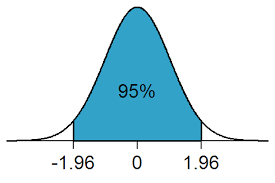

In [120]:
def get_upper_lower(preds):
    # generating 95% prediction interval
    std = tf.math.reduce_std(preds,axis=0)
    
    interval = 1.96*std
    
    preds_mean = tf.reduce_mean(preds,axis=0)
    
    lower, upper = preds_mean-interval, preds_mean+interval
    return lower, upper

In [122]:
ensemble_lower, ensemble_upper = get_upper_lower(ensemble_preds)
ensemble_lower[:5], ensemble_upper[:5]

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8728.382, 8728.286, 9021.653, 8663.548, 8679.319], dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([8825.976, 8813.747, 9133.974, 8794.655, 8793.872], dtype=float32)>)

In [123]:
y_test[:5]

Date
2019-11-10    8798.042055
2019-11-11    9081.186878
2019-11-12    8711.534339
2019-11-13    8760.892718
2019-11-14    8749.520591
Name: Price, dtype: float64

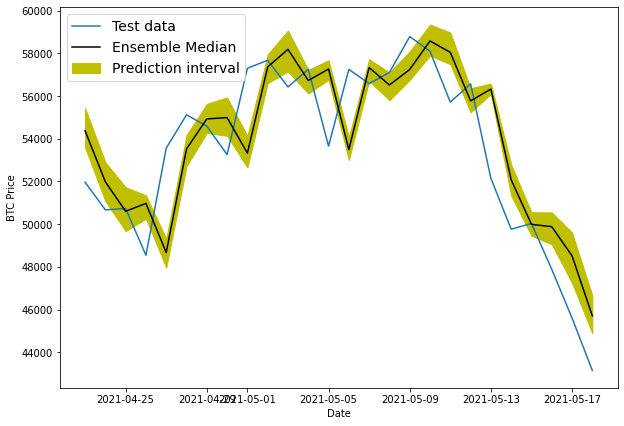

In [137]:
# Plotting ensemble preds with lower and upper bounds
offset = 530

plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:],y_test[offset:],"-",label="Test data")
plt.plot(X_test.index[offset:],ensemble_median[offset:],"k-",label="Ensemble Median")
# plt.plot(X_test.index[offset:],y_test[offset:],"o",label="Test data")
plt.xlabel('Date')
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],ensemble_lower[offset:],ensemble_upper[offset:],label="Prediction interval",color='y')
plt.legend(loc="upper left",fontsize=14)

# Test data looks like it is lagging behind

### Uncertainties
- Coconut and Subway

Two major uncertainties in ML:
- `Aleatoric uncertainty` - Cannot be reduced. Called as data or subway uncertainty.
- `Epistemic uncertainty` - Can be reduces, known as model or coconut uncertainty.

### Future prediction model

In [138]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [139]:
X_all = bitcoin_prices_windowed.dropna().drop(['Price',"block_reward"],axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

In [141]:
X_all[:3],y_all[:3]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483]]),
 array([123.033  , 124.049  , 125.96116]))

In [144]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all,labels_dataset_all)).batch(1024).prefetch(tf.data.AUTOTUNE)

In [147]:
future_model = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
])
future_model.compile(loss='mae',optimizer='adam')
future_hist = future_model.fit(dataset_all,epochs=100,verbose=0,callbacks=[create_model_checkpoint(model_name="Future_Model")])

In [169]:
INTO_FUTURE = 14
def make_future_forecasts(values,model,into_future,window_size=WINDOW_SIZE) -> list:
    future_forecasts = []
    last_window = values[-window_size:]
    
    for _ in range(into_future):
        future_pred = model.predict(tf.expand_dims(last_window,axis=0))
        print(f"Predicting on {last_window} -> Prediction: {future_pred}")
        
        future_forecasts.append(tf.squeeze(future_pred).numpy())
        last_window = np.append(last_window, future_pred)[-window_size:]
    return future_forecasts

In [194]:
future_forecast = make_future_forecasts(
values=y_all,
    model=future_model,
    into_future=INTO_FUTURE,
    window_size=WINDOW_SIZE
)

Predicting on [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: [[56156.31]]
Predicting on [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56156.30859375] -> Prediction: [[50808.508]]
Predicting on [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56156.30859375 50808.5078125 ] -> Prediction: [[48888.688]]
Predicting on [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56156.30859375 50808.5078125  48888.6875    ] -> Prediction: [[46937.555]]
Predicting on [47885.62525472 45604.61575361 43144.47129086 56156.30859375
 50808.5078125  48888.6875     46937.5546875 ] -> Prediction: [[48563.363]]
Predicting on [45604.61575361 43144.47129086 56156.30859375 50808.5078125
 48888.6875     46937.5546875  48563.36328125] -> Prediction: [[46545.086]]
Predicting on [43144.47129086 56156.30859375 50808.5078125  48888.6875
 46937.5546875  48563.363

In [158]:
# offset = 530

# plt.figure(figsize=(10,7))
# plt.plot(X_test.index[offset:],y_test[offset:],"-",label="Test data")
# plt.plot(X_test.index[offset:],ensemble_median[offset:],"k-",label="Ensemble Median")
# # plt.plot(X_test.index[offset:],y_test[offset:],"o",label="Test data")
# plt.xlabel('Date')
# plt.ylabel("BTC Price")
# plt.fill_between(X_test.index[offset:],ensemble_lower[offset:],ensemble_upper[offset:],label="Prediction interval",color='y')
# plt.legend(loc="upper left",fontsize=14)
def get_future_dates(start_date,into_future,offset=1):
    
    start_date = start_date + np.timedelta64(offset,"D")
    end_date = start_date + np.timedelta64(into_future,"D")
    return np.arange(start_date, end_date, dtype="datetime64[D]")

last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [196]:
len(future_forecast)

14

In [195]:
next_time_steps = get_future_dates(last_timestep,14)
len(next_time_steps)

14

In [187]:
list(bitcoin_prices.values)[-1]

array([43144.47129086])

In [197]:
next_time_steps = np.insert(next_time_steps,0,last_timestep)
future_forecast = np.insert(future_forecast,0,43144.47129086)
len(next_time_steps),len(future_forecast)

(15, 15)

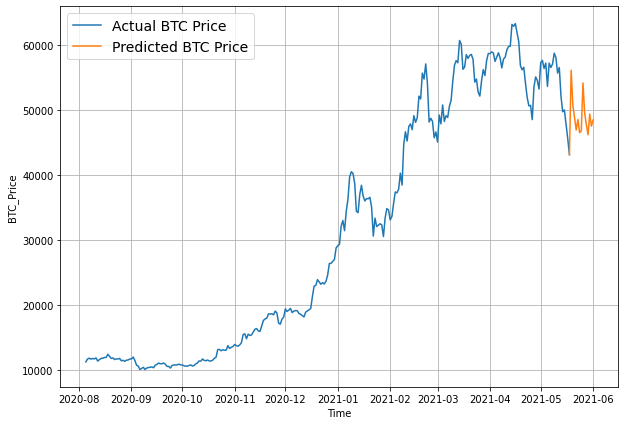

In [198]:
plt.figure(figsize=(10,7))
plotts(bitcoin_prices.index,bitcoin_prices,start=2500,format="-",label="Actual BTC Price")
plotts(next_time_steps, future_forecast, format="-",label="Predicted BTC Price")

### Turkey Problem
- Let's say that the price of bitcoin falls by 100x in one day.

In [37]:
price_turkey = prices.copy()
price_turkey[-1] = price_turkey[-1]/100
price_turkey[-5:], prices[-5:]

(array([49764.1320816 , 50032.69313676, 47885.62525472, 45604.61575361,
          431.44471291]),
 array([49764.1320816 , 50032.69313676, 47885.62525472, 45604.61575361,
        43144.47129086]))

In [38]:
turkey_timesteps = np.array(bitcoin_prices.index)
turkey_timesteps[-5:]

array(['2021-05-14T00:00:00.000000000', '2021-05-15T00:00:00.000000000',
       '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
       '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

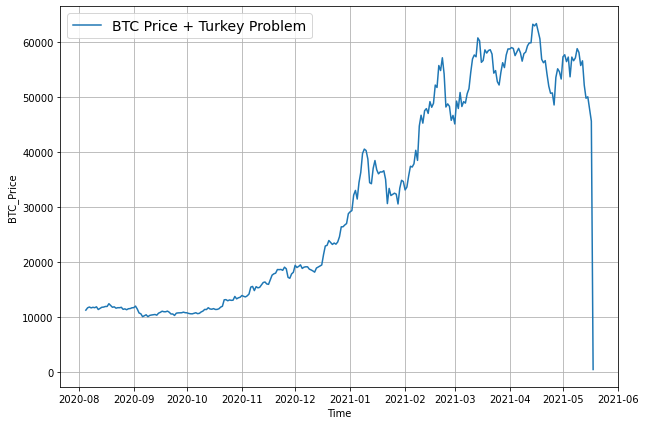

In [43]:
plt.figure(figsize=(10,7))
start=2500
plotts(turkey_timesteps,price_turkey,start=start,format='-',label="BTC Price + Turkey Problem")

In [44]:
full_windows, full_labels = make_windows(price_turkey,window_size=WINDOW_SIZE,horizon=HORIZON)
X_train, X_test, y_train, y_test = make_train_test_aplit(full_windows,full_labels)

In [45]:
m1.summary()

NameError: name 'm1' is not defined